# Session 5: Data structuring - aggregation and joining

In this combined teaching module and exercise set you will be working with how to aggregating and joining different datasets.

The exercises will continue the work with weather data we started working on in Exercise Set 4. We will also study a dataset of traffic data from Copenhagen to iterate through the pandas workflow once more. 

#### Packages
First load in the required modules and set up the plotting library:

In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

# Increases the plot size a little
mpl.rcParams['figure.figsize'] = 11, 6

%matplotlib inline 

### We are not done with pandas (yet!)
This is the final session on using pandas. We will cover the exciting methods for aggregation and working on parts of the data as well as combining different datasets. See the intro video and brief recap video below.

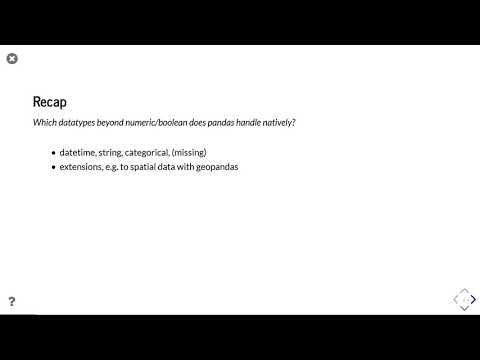

In [30]:
from IPython.display import YouTubeVideo
YouTubeVideo('KB_nSpQRPS8', width=640, height=360)

# Joining datasets
### How to combine two or more dataframes into one
Below we hear about how different datasets can be combined into one, by merging on overlapping information that exists in both datasets. If you want to know more then you can look up Chapter 8, section 8.2 in Python for Data Analysis, 2ed.

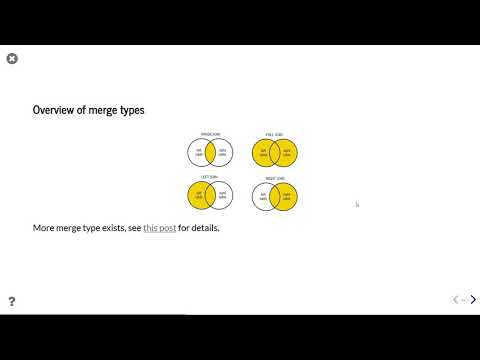

In [31]:
YouTubeVideo('JrCKDbmWGgM', width=640, height=360)

## Exercises on weather data - final part
We continue with the final part of three exercises on structuring weather data. Use the function for fetching and structuring weather data that you used in part 2 of this exercise (i.e. exercise section 4.1).



> **Ex. 5.1.1:** Get the processed data from years 1870-1875 as a list of DataFrames. Convert the list into a single DataFrame by concatenating vertically. 

In [32]:
COLS = ['station', 'datetime', 'obs_type', 'obs_value']

def load(year):

    """ 
    Generates a dataframe from a certain URL, by inserting an integer in the range 4 - 8,
    measuring the year.

    """
    url = f'ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz'
    df_new = pd.read_csv(url)
    df_new = df_new.iloc[: , :4]
    df_new.columns = COLS
    df_new['obs_value'] = df_new['obs_value'] / 10
    return df_new

new_list = [1870 , 1871 , 1872 , 1873 , 1874 , 1875]

list_of_dfs = [load(l) for l in new_list]

In [33]:
df_weather_period = pd.concat(list_of_dfs , axis = 0)

In [34]:
df_weather_period['datetime_dt'] = pd.to_datetime(df_weather_period.datetime.astype(str))

In [35]:
# Tilføjer kolonner og formaterer til datoformat
df_weather_period['month'] = df_weather_period['datetime_dt'].dt.month
df_weather_period['year'] = df_weather_period['datetime_dt'].dt.year
df_weather_period = df_weather_period[df_weather_period.obs_type == 'TMAX']
df_weather_period.set_index('datetime_dt', inplace = True)
df_weather_period

,station,datetime,obs_type,obs_value,month,year
datetime_dt,,,,,,
1870-01-01,ASN00066062,18700101,TMAX,27.1,1,1870
1870-01-01,ASN00074128,18700101,TMAX,41.1,1,1870
1870-01-01,ASN00086071,18700101,TMAX,23.3,1,1870
1870-01-01,ASN00090015,18700101,TMAX,20.0,1,1870
1870-01-01,AU000005901,18700101,TMAX,-0.9,1,1870
...,...,...,...,...,...,...
1875-12-31,USW00023068,18751231,TMAX,2.2,12,1875
1875-12-31,USW00024274,18751231,TMAX,12.2,12,1875
1875-12-31,USW00093820,18751231,TMAX,21.7,12,1875


# Split-apply-combine
### A framework for processing data in parts
Often we need to process information for a given individual, point in time etc. Instead of writing a loop over all the subsets of the data, we can use a more clever approach. Below we introduce the split-apply-combine framework and show how we can leverage it in pandas. If you want to know more then you can look up Chapter 10 in Python for Data Analysis, 2ed.

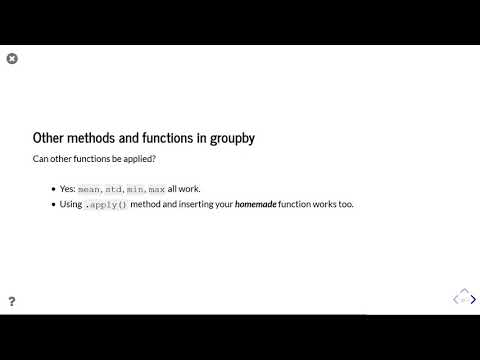

In [36]:
YouTubeVideo('khSWRMPqATQ', width=640, height=360)

> **Ex. 5.1.2:** Compute the mean maximum daily temperature for each month-year pair. 

In [37]:
df_weather_period.groupby(['year', 'month']).obs_value.describe()

count       mean        std    min   25%    50%   75%   max
year month                                                              
1870 1      1008.0   6.237698  10.945874  -21.7  -0.6   3.45   8.9  45.0
     2       916.0   5.341376  11.830484  -20.0  -2.2   2.20   9.4  44.4
     3       997.0   7.628285   9.468493  -15.4   1.1   5.50  12.2  36.9
     4       931.0  15.563050   6.764223   -6.6  11.1  15.40  20.0  32.8
     5       973.0  19.785612   6.214468   -3.0  15.8  19.40  23.9  36.2
...            ...        ...        ...    ...   ...    ...   ...   ...
1875 8      2744.0  23.911261   5.061859    2.0  20.6  24.40  27.6  37.2
     9      2657.0  19.877832   5.917893    0.7  15.6  19.40  23.9  36.7
     10     2865.0  13.649564  17.067470 -573.3   8.9  13.30  18.9  37.9
     11     2866.0   6.860328  14.279311 -573.3   1.7   5.60  11.1  38.3
     12     2932.0   5.001091  10.387813  -24.4  -1.1   3.30  10.0  35.8

[72 rows x 8 columns]

> **Ex. 5.1.3:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for our station with the ID _'ITE00100550'_ for the years 1870-1875. 

> *Hint*: the method `describe` computes all these measures.

In [38]:
df_weather_period[df_weather_period.station == "ITE00100550"].groupby('month').obs_value.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,186.0,5.560215,2.949306,-0.5,3.300,5.25,7.200,14.4
2,169.0,7.829586,3.487693,-2.0,5.200,8.00,10.000,15.3
3,186.0,13.186559,3.794018,2.9,10.225,13.80,15.775,23.8
4,180.0,19.684444,4.023073,5.8,17.000,19.50,23.000,29.3
5,186.0,24.262903,4.582560,12.0,21.000,24.00,27.000,36.2
6,180.0,29.123333,3.985450,17.0,26.350,30.00,32.000,37.0
7,186.0,33.006989,2.809887,25.4,31.000,33.00,35.000,39.8
8,186.0,30.875806,2.920886,23.0,29.000,31.00,32.975,37.0
9,180.0,27.383333,3.309889,16.8,25.950,27.80,29.500,33.0


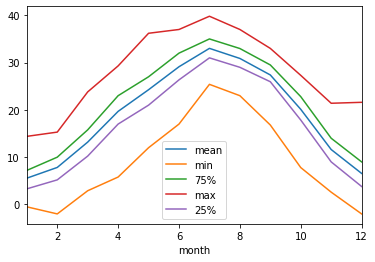

In [39]:
df_weather_period[df_weather_period.station == "ITE00100550"].groupby('month').obs_value.describe()[['mean','min','75%','max','25%']].plot()

> **Ex. 5.1.4:** Parse the station location data which you can find at https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt. Merge station locations onto the weather data spanning 1870-1875.  

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has fixed width format - does there exist a pandas reader for that?

In [40]:
colnames = ['station' , 'LATITUDE' , 'LONGITUDE' , 'ELEVATION' , 'STATE' , 'NAME' , 'GSN FLAG' , 'HCN/CRN FLAG' , 'WMO ID']

station_loc = pd.read_fwf('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt' , header = None , names = colnames)

station_loc.head()

,station,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSN FLAG,HCN/CRN FLAG,WMO ID
0,ACW00011604,17.1167,-61.7833,10.1,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,ST JOHNS,NaN,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,SHARJAH INTER. AIRP,NaN,GSN,41196.0,NaN
3,AEM00041194,25.2550,55.3640,10.4,DUBAI INTL,NaN,NaN,41194.0,NaN
4,AEM00041217,24.4330,54.6510,26.8,ABU DHABI INTL,NaN,NaN,41217.0,NaN


In [41]:
df_location = pd.merge(df_weather_period , station_loc , on = 'station' , how = 'left')
df_location['datetime_dt'] = pd.to_datetime(df_location.datetime.astype(str))
df_location.set_index('datetime_dt', inplace = True)


print(df_location)

station  datetime obs_type  obs_value  month  year  LATITUDE  \
datetime_dt                                                                     
1870-01-01   ASN00066062  18700101     TMAX       27.1      1  1870   33.8607   
1870-01-01   ASN00074128  18700101     TMAX       41.1      1  1870   35.5269   
1870-01-01   ASN00086071  18700101     TMAX       23.3      1  1870   37.8075   
1870-01-01   ASN00090015  18700101     TMAX       20.0      1  1870   38.8556   
1870-01-01   AU000005901  18700101     TMAX       -0.9      1  1870   48.2331   
...                  ...       ...      ...        ...    ...   ...       ...   
1875-12-31   USW00023068  18751231     TMAX        2.2     12  1875   38.2725   
1875-12-31   USW00024274  18751231     TMAX       12.2     12  1875   45.5333   
1875-12-31   USW00093820  18751231     TMAX       21.7     12  1875   38.0408   
1875-12-31   USW00093852  18751231     TMAX       25.6     12  1875   30.3333   
1875-12-31   USW00094728  18751231     TMAX  

# Reshaping  dataframes

Often we have data that comes in a format that does not fit our purpose. If you want to know more then you can look up Chapter 8, section 8.3 in Python for Data Analysis, 2ed.

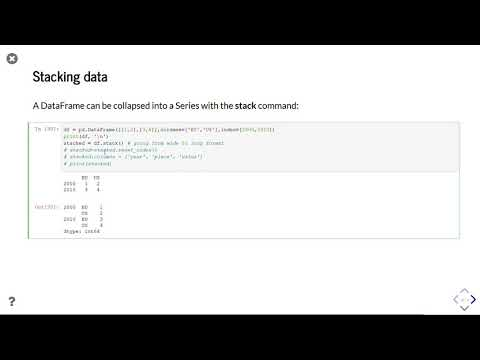

In [42]:
YouTubeVideo('kJO85WOXNEU', width=640, height=360)

> **Ex. 5.1.5:** For which months was the temperature in general colder in 1870 vs. 1875?

> *Hint: you may use `unstack`.


In [81]:
table = pd.pivot_table(df_location[(df_location.year == 1870) | (df_location.year == 1875)] , values = ['obs_value'] , index = ['month'] , columns = ['year'] , aggfunc = np.mean)

table['diff'] = table.iloc[: , 1] - table.iloc[: , 0]

print(table)
print('August was warmer in 1875')

obs_value                 diff
year        1870       1875          
month                                
1       6.237698   1.378859 -4.858840
2       5.341376   1.398433 -3.942943
3       7.628285   6.160701 -1.467584
4      15.563050  12.145271 -3.417779
5      19.785612  18.162837 -1.622774
6      23.142553  22.259036 -0.883518
7      24.546653  23.759534 -0.787120
8      23.051009  23.911261  0.860252
9      20.300396  19.877832 -0.422564
10     16.137261  13.649564 -2.487697
11     11.124189   6.860328 -4.263861
12      5.514842   5.001091 -0.513751
August was warmer in 1875


# Summary and beyond pandas

We round off this lecture with a brief summary of the most important points. I also review some packages that you can look at, which allows you to scale up your data analysis.

In [83]:
YouTubeVideo('CKg3MjnhVlg', width=640, height=360)

## More practice: Traffic data in Copenhagen

In this second part set of exercises you will be working with traffic data from Copenhagen Municipality.

The municipality have made the data openly available through the [opendata.dk](http://www.opendata.dk/) platform. We will use the data from traffic counters to construct a dataset of hourly traffic. We will use this data to get basic insights on the development in traffic over time and relate it to weather. The gist here is to practice a very important skill in Data Science: being able to quickly fetch data from the web and structure it so that you can work with it. Scraping usually gets a bit more advanced than what we will do today, but the following exercises should give you a taste for how it works. The bulk of these exercise, however, revolve around using the Pandas library to structure and analyze data.

### Part 5.2.a: getting some data to work with

Hence follows a simple scraping exercise where you (1) collect urls for datasets in the webpage listing data on traffic counters and (2) use these urls to load the data into one dataframe.

> **Ex. 5.2.1:** Using the requests module, extract the html markup of the webpage https://www.opendata.dk/city-of-copenhagen/faste-trafiktaellinger and store it as a string in a new variable.

In [102]:
import requests
import re

response = requests.get('https://www.opendata.dk/city-of-copenhagen/faste-trafiktaellinger')


url_string = response.text


> **Ex. 5.2.2:** Using the re module, extract a list of all the urls in the html string and store them in a new variable.

> _Hint:_ Try using the re.findall method. You may want to Google around to figure out how to do this. Searching for something along the lines of "extract all links in html regex python" and hitting the first StackOverflow link will probably get you farther than reading elaborate documentation.

In [97]:
urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', url_string)

print(urls)

['https://code.jquery.com/jquery-3.3.1.min.js', 'https://www.survey-xact.dk/LinkCollector?key=X3LGR2APJJ15', 'https://admin.opendata.dk/dataset/5f9345b0-d73b-43ff-a659-e468d160bc61/resource/dcb49b51-1a17-40f6-82b4-34eaf58bce57/download/faste-trafiktaellinger-2005.xlsx', 'https://admin.opendata.dk/dataset/5f9345b0-d73b-43ff-a659-e468d160bc61/resource/dcb49b51-1a17-40f6-82b4-34eaf58bce57/download/faste-trafiktaellinger-2005.xlsx', 'https://admin.opendata.dk/dataset/5f9345b0-d73b-43ff-a659-e468d160bc61/resource/0bfc0425-0b2f-43b4-be71-117b4265598d/download/faste-trafiktaellinger-2006.xlsx', 'https://admin.opendata.dk/dataset/5f9345b0-d73b-43ff-a659-e468d160bc61/resource/0bfc0425-0b2f-43b4-be71-117b4265598d/download/faste-trafiktaellinger-2006.xlsx', 'https://admin.opendata.dk/dataset/5f9345b0-d73b-43ff-a659-e468d160bc61/resource/f52749f9-6f90-4f63-a151-c4020d4b2396/download/faste-trafiktaellinger-2007.xlsx', 'https://admin.opendata.dk/dataset/5f9345b0-d73b-43ff-a659-e468d160bc61/resource/

> **Ex. 5.2.3:** Create a new variable `datalinks` that only contains the links that point to downloadable traffic data sheets. Some links may be preset more than once on the page. To get the unique links use the `set()` function on `datalinks`.

> _Hint:_ You want to filter the results from above. For example to only include urls with the term 'download' in them.

In [104]:
links = list(set(urls)) #Laver en liste over unikke links
datalinks = [k for k in links if 'xlsx' in k] #filtrerer URLS der refererer til excel
print(datalinks)

['https://admin.opendata.dk/dataset/5f9345b0-d73b-43ff-a659-e468d160bc61/resource/f52749f9-6f90-4f63-a151-c4020d4b2396/download/faste-trafiktaellinger-2007.xlsx', 'https://admin.opendata.dk/dataset/5f9345b0-d73b-43ff-a659-e468d160bc61/resource/0bfc0425-0b2f-43b4-be71-117b4265598d/download/faste-trafiktaellinger-2006.xlsx', 'https://admin.opendata.dk/dataset/5f9345b0-d73b-43ff-a659-e468d160bc61/resource/e4f321ad-76bc-483f-839e-e04cfea6bfc0/download/faste-trafiktaellinger-2008.xlsx', 'https://admin.opendata.dk/dataset/5f9345b0-d73b-43ff-a659-e468d160bc61/resource/8b2f60a9-17ac-437d-ae6e-ad44c0a49edd/download/faste-trafiktaellinger-2011.xlsx', 'https://admin.opendata.dk/dataset/5f9345b0-d73b-43ff-a659-e468d160bc61/resource/03f2768e-0ff0-4b42-9d3d-be268e131088/download/faste-trafiktaellinger-2014.xlsx', 'https://admin.opendata.dk/dataset/5f9345b0-d73b-43ff-a659-e468d160bc61/resource/a209aef9-802c-4cda-9b42-f4364877b04f/download/faste-trafiktaellinger-2010.xlsx', 'https://admin.opendata.dk/

> **Ex. 5.2.4:** Using pd.read_excel method, load the datasets into a list. Your resulting variable should hold a list of Pandas dataframes.

> _Hint:_ you may want to set the `skiprows` keyword argument. 

In [105]:
datasets = [pd.read_excel(link) for link in datalinks]

> **Ex. 5.2.5:** Concatenate the list of dataframes into a single dataframe.

In [143]:
df_datasets = pd.concat(datasets , axis = 0)

### Part 5.2.b Structuring your data

If you successfully completed the previous part, you should now have a dataframe with about 183.397 rows (if your number of rows is close but not the same, worry not—it matters little in the following). Well done! But the data is still in no shape for analysis, so we must clean it up a little.

183.397 rows (and 30 columns) is a lot of data. ~3.3 MB by my back-of-the-envelope calculations, so not "Big Data", but still enough to make your CPU heat up if you don't use it carefully. Pandas is built to handle fairly large dataframes and has advanced functionality to perform very fast operations even when the size of your data grows huge. So instead of working with basic Python we recommend working pandas built-in procedures as they are constructed to be fast on dataframes.

Nerd fact: the reason pandas is much faster than pure Python is that dataframes access a lower level programming languages (namely C, C++) which are multiple times faster than Python. The reason it is faster is that it has a higher level of explicitness and thus is more difficult to learn and navigate.

> **Ex. 5.2.6:** Reset the row indices of your dataframe so the first index is 0 and the last is whatever the number of rows your dataframe has. Also drop the column named 'index' and the one named `Spor`.

In [144]:
df_datasets = df_datasets.iloc[9: , :]
new_header = df_datasets.iloc[0]
df_datasets = df_datasets.iloc[1:]
df_datasets.columns = new_header
df_datasets.drop(columns = ['Spor'])
df_datasets.reset_index(drop = True)

9,NaN,NaN,kl.04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,kl.19-20,kl.20-21,kl.21-22,kl.22-23,kl.23-24,(UTM32),Dato,kl.00-01,kl.01-02,kl.02-03
0,NaN,NaN,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,435,285,269,243,154,6172777,01.01.2007,166,357,337
1,NaN,NaN,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,528,359,363,280,183,6172777,02.01.2007,69,60,52
2,NaN,NaN,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,539,392,360,323,196,6172777,03.01.2007,105,68,65
3,NaN,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,543,427,421,387,237,6172777,04.01.2007,90,58,71
4,NaN,NaN,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,618,471,425,354,285,6172777,05.01.2007,121,50,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,NaN,...,559,426,192,102,76,6171542,27.12.2013,48,19,16
183483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,NaN,...,419,309,171,99,77,6171542,28.12.2013,59,26,22
183484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,...,391,284,195,94,63,6171542,29.12.2013,49,46,43
183485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN,...,792,573,414,236,135,6171542,30.12.2013,45,23,19


In [51]:
# [Answer to Ex. 5.2.7]

Python is quite efficient. For example, when you create a new dataframe by manipulating an old one, Python notices that—apart from some minor changes—these two objects are almost the same. Since memory is a precious resource, Python will represent the values in the new dataframe as references to the variables in the old dataset. This is great for performance, but if you for whatever reason change some of the values in your old dataframe, values in the new one will also change—and we don't want that! Luckily, we can break this dependency.

> **Ex. 5.2.8:** Break the dependencies of the dataframe that resulted from Ex. 5.2.7 using the `.copy` method. Delete all other dataframes.

In [52]:
# [Answer to Ex. 5.2.8]

Once you have structured appropriately, something that you will want to do again and again is selecting subsets of the data. Specifically, it means that you select specific rows in the dataset based on some column values.

>**Ex. 5.2.9:** Create a new column in the dataframe called total that is True when the last letter of road_id is T and otherwise False.

> _Hint:_ you will need the `pd.Series.str` attribute for this.

In [53]:
# [Answer to Ex. 5.2.9]

> **Ex. 5.2.10:** Select rows where total is True. Delete all the remaining observations.

In [54]:
# [Answer to Ex. 5.2.10]

> **Ex. 5.2.11:** Make two datasets based on the lists of columns below. Call the dataset with spatial columns data_geo and the other data.

```python
# Columns for `geo_data`, stored in `geo_columns`
spatial_columns = ['road_name', 'UTM32_north', 'UTM32_east']

# Columns for `data`, stored in `select_columns`
hours = [f'kl.{str(h).zfill(2)}-{str(h+1).zfill(2)}' for h in range(24)]
select_columns = ['road_name', 'date'] + hours
```

In [55]:
# [Answer to Ex. 5.2.11]

> **Ex. 5.2.12:** Drop the duplicate rows in data_geo.

In [56]:
# [Answer to Ex. 5.2.12]

**Formatting: wide and narrow format**

When talking about two-dimensional data (matrices, tables or dataframes, we can call it many things), we can either say that it is in wide or long format (see explanation here, "wide" and "long" are used interchangably). In Pandas we can use the commands stack and unstack to move between these formats.

The wide format has the advantage that it often requires less storage and is easier to read when printed. On the other hand the long format can be easier for modelling, because each observation has its own row. Turns out that the latter is what we most often need.

> **Ex. 5.2.13:** Turn the dataset from wide to long so hourly data is now vertically stacked. Store this dataset in a dataframe called data. Name the column with hourly information hour_period. Your resulting dataframe should look something like this.

> _Hint:_ pandas' melt function may be of use.

In [57]:
# [Answer to Ex. 5.2.13]

**Categorical data**

Categorical data can contain Python objects, usually strings. These are smart if you have variables with string observations that are long and often repeated, e.g. with road names.

> **Ex. 5.2.14:** Use the `.astype` method to convert the type of the road_name column to categorical.

In [58]:
# [Answer to Ex. 5.2.14]

### Structure temporal data

Pandas has native support for working with temporal data. This is handy as much 'big data' often has time stamps which we can make Pandas aware of. Once we have encoded temporal data it can be used to extract information such as the hour, second etc.

> **Ex. 5.2.15:** Create a new column called hour which contains the hour-of-day for each row. 

In [59]:
# [Answer to Ex. 5.2.15]

>**Ex. 5.2.16:** Create a new column called time, that contains the time of the row in datetime format. Delete the old temporal columns (hour, hour_period, date) to save memory.

> _Hint:_ try making an intermediary series of strings that has all temporal information for the row; then use pandas to_datetime function where you can specify the format of the date string.

In [60]:
# [Answer to Ex. 5.2.16]

> **Ex. 5.2.17:** Using your time column make a new column called weekday which stores the weekday (in values between 0 and 6) of the corresponding datetime.

> _Hint:_ try using the dt method for the series called time; dt has some relevant methods itself.

In [61]:
# [Answer to Ex. 5.2.17]

### Statistical descriptions of traffic data

> **Ex. 5.2.18:** Print the "descriptive statistics" of the traffic column. Also show a kernel density estimate of the values.

> _Hint:_ Use the describe method of pandas dataframes for the first task. Use seaborn for the second. 

In [62]:
# [Answer to Ex. 5.2.18]

> **Ex. 5.2.19:** Which road has the most average traffic?

In [63]:
# [Answer to Ex. 5.2.19]

> **Ex. 5.2.20:** Compute annual, average road traffic during day hours (9-17). Which station had the least traffic in 2013? Which station has seen highest growth in traffic from 2013 to 2014?

In [64]:
# [Answer to Ex. 5.2.20]